In [1]:
from sumolib import checkBinary  # noqa
import sumolib
import traci  # noqa
import os
import sys
from pathlib import Path
import traci

try:
    dir = Path("Simulation_Environment\Main MADDPG")
    sumoBinary = checkBinary('sumo')
    # sumoBinary = checkBinary('sumo-gui')
    # we need to import python modules from the $SUMO_HOME/tools directory
    if 'SUMO_HOME' in os.environ:
        tools = os.path.join(os.environ['SUMO_HOME'], 'tools')
        sys.path.append(tools)
    else:
        sys.exit("please declare environment variable 'SUMO_HOME'")
    traci.start([sumoBinary, "-c", f"{dir}\osm.sumocfg",
                            "--tripinfo-output", f"{dir}\\Results\\tripinfo.xml",  "--start"])
    #start net
    net = sumolib.net.readNet(Path(f"{dir}\\osm.net.xml"))
except Exception as e:
    print(e)

print("Traci and sumolib Net is running in background...")


Traci and sumolib Net is running in background...


In [3]:
trafficlight = traci.trafficlight.getIDList()[0]

phase_idx = int(0)
duration=float(60)

# #Set the time on phase
# traci.trafficlight.setPhase(trafficlight, phase_idx)
# traci.trafficlight.setPhaseDuration(trafficlight, int(duration))

traci.trafficlight.getCompleteRedYellowGreenDefinition(trafficlight)[0].getPhases()[0].duration = duration

traci.trafficlight.getAllProgramLogics(trafficlight)

(Logic(programID='0', type=0, currentPhaseIndex=0, phases=(Phase(duration=33.0, state='rrrrGGGrrrrrGGGg', minDur=33.0, maxDur=33.0, next=()), Phase(duration=6.0, state='rrrryyyrrrrryyyg', minDur=6.0, maxDur=6.0, next=()), Phase(duration=33.0, state='rrrrrrrGrrrrrrrG', minDur=33.0, maxDur=33.0, next=()), Phase(duration=6.0, state='rrrrrrryrrrrrrry', minDur=6.0, maxDur=6.0, next=()), Phase(duration=33.0, state='GGGgrrrrGGGgrrrr', minDur=33.0, maxDur=33.0, next=()), Phase(duration=6.0, state='yyyyrrrryyyyrrrr', minDur=6.0, maxDur=6.0, next=())), subParameter={}),)

In [9]:
program = traci.trafficlight.getAllProgramLogics(trafficlight)[0]
program.phases[0].duration = 60
program
traci.trafficlight.setProgramLogic(trafficlight)

Logic(programID='0', type=0, currentPhaseIndex=0, phases=(Phase(duration=60, state='rrrrGGGrrrrrGGGg', minDur=33.0, maxDur=33.0, next=()), Phase(duration=6.0, state='rrrryyyrrrrryyyg', minDur=6.0, maxDur=6.0, next=()), Phase(duration=33.0, state='rrrrrrrGrrrrrrrG', minDur=33.0, maxDur=33.0, next=()), Phase(duration=6.0, state='rrrrrrryrrrrrrry', minDur=6.0, maxDur=6.0, next=()), Phase(duration=33.0, state='GGGgrrrrGGGgrrrr', minDur=33.0, maxDur=33.0, next=()), Phase(duration=6.0, state='yyyyrrrryyyyrrrr', minDur=6.0, maxDur=6.0, next=())), subParameter={})

In [8]:
import traci

traci.close()

In [ ]:

phases = traci.trafficlight.getCompleteRedYellowGreenDefinition('recto_osmena_tl')[0].getPhases()
min_val = min([i.duration for i in phases])
duration = [i.duration for i in phases if 'y' not in i.state]
duration

In [ ]:
import numpy as np
x = np.round(np.hstack([[1,2,3],[4,5,6]])/5)
x

In [1]:
tls =  'recto_osmena_tl'
traci.trafficlight.getRedYellowGreenState(tls)
traci.trafficlight.getCompleteRedYellowGreenDefinition(tls)[0].getPhases()[0].duration = 34
traci.trafficlight.getCompleteRedYellowGreenDefinition(tls)[0].getPhase()

NameError: name 'traci' is not defined

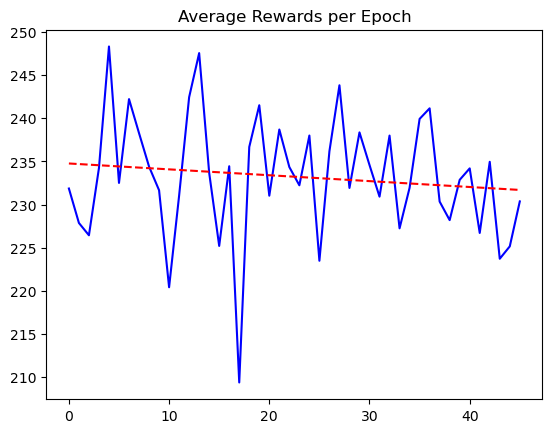

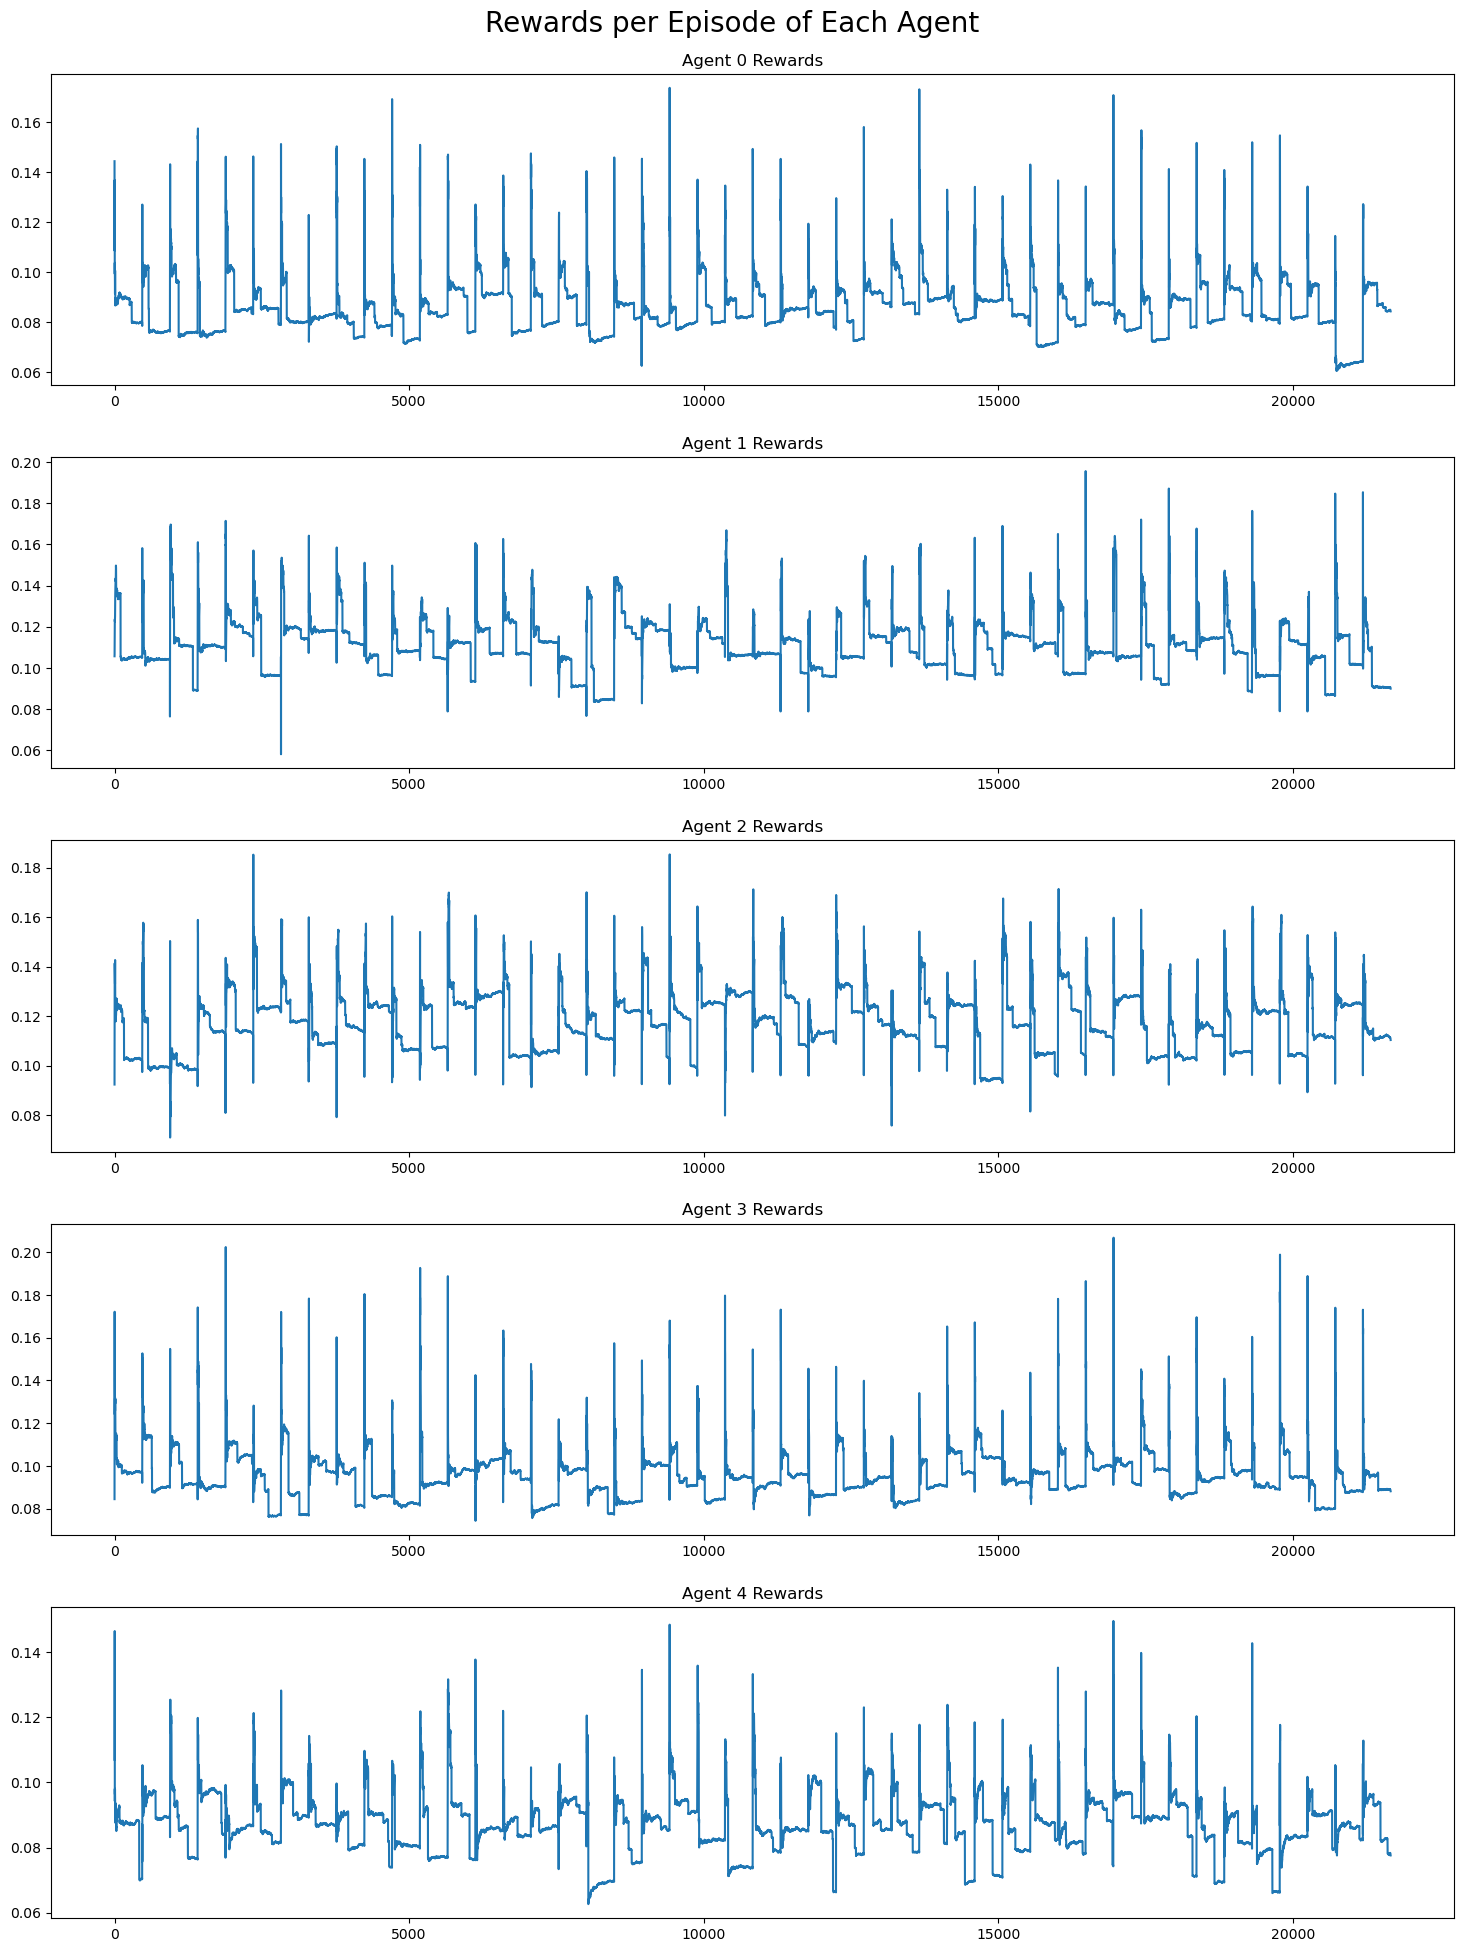

In [6]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

#Load Average csv
df = pd.read_csv("average.csv", index_col=0, keep_date_col=False, header=None, names=['y'])

#Create Regression Line
df.rename(columns={df.columns[0]:'y'}, inplace=True)
df['x'] = df.index.to_list()
y = df.pop('y')
x = df
reg = LinearRegression()
reg.fit(x,y)
y_predict = reg.predict(x)

#plot average reward per epoch
plt.plot(x,y, color='b')
plt.plot(x,y_predict, color='r', linestyle='dashed')
plt.title('Average Rewards per Epoch')
plt.show()

#Load rewards csv
rewards_df = pd.read_csv('rewards.csv', header=None, names=['agents'])
rewards_df.head()

#Separate Data
pattern = r'\d.\d+'

all_data = []
for data in rewards_df['agents']:
    vals = [float(i) for i in re.findall(pattern, data)]

    if len(vals) != 5:
        vals = vals + [0]*(5-len(vals))
    
    all_data.append(vals)

all_data = np.array(all_data)

#Create pandas DataFrame from separated data
verbose_df = pd.DataFrame(all_data)
verbose_df.columns = [f'Agent {i}' for i in verbose_df.columns.to_list()]


#plot reward of each agent per episode
fig, ax = plt.subplots(all_data.shape[1], figsize=[15,20])
fig.suptitle('Rewards per Episode of Each Agent', fontsize=20)
for idx, col in enumerate(verbose_df.columns.to_list()):
    ax[idx].plot(np.arange(0,all_data.shape[0],1),verbose_df[col])
    ax[idx].set_title(f'Agent {idx} Rewards')
fig.tight_layout(pad=2)
plt.show()

In [7]:
import os
import glob
import matplotlib.pyplot as plt
import time
import pandas as pd
from IPython.display import clear_output

def get_csv_files(directory):
    """
    Gets all CSV files in a directory.

    Args:
    directory (str): The directory to search for CSV files.

    Returns:
    List[str]: A list of paths to CSV files in the directory.
    """
    csv_files = []
    for file in glob.glob(os.path.join(directory, '*.csv')):
        csv_files.append(file)
    return csv_files

log_files = get_csv_files(r'loss_logs')



while True:
    fig, ax = plt.subplots(len(log_files), figsize=[15,10])
    for idx, file in enumerate(log_files):
        df = pd.read_csv(file)

        cur_ax = ax[idx]
        cur_ax.plot(df.index.to_list(), df.iloc[:,0], label='Actor Loss', color='r')
        cur_ax.plot(df.index.to_list(), df.iloc[:,1], label='Critic Loss', color='b')
        ax_name = ' '.join(os.path.basename(file).split('tl_loss.')[0].split('_'))
        cur_ax.set_xlabel('Episodes')
        cur_ax.set_ylabel('Loss')
        cur_ax.set_title(ax_name.title().strip())
        cur_ax.legend()

    fig.suptitle('Loss Curves for All Traffic Light w/ Actor and Critic')
    fig.tight_layout()
    plt.show()
    time.sleep(5)
    clear_output(wait=True)

KeyboardInterrupt: 